# Project Name: Doctor Consultation Fees Project


About Project: We have data that records important details about a doctor and we have to build a model to predict the doctor’s consultation fee. Where features are Qualification, Experience, Rating etc. and target variable is  Doctor Consultation Fees. 

In [249]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [250]:
#Import Dataset
ds= pd.read_excel('Doctor_Fees_Final_Train.xlsx')
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [251]:
df= pd.DataFrame(data=ds)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [252]:
df.shape

(5961, 7)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [254]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [255]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [256]:
#Checking for Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observations: Null values are present in columns Rating , Place and Miscellaneous_Info.               

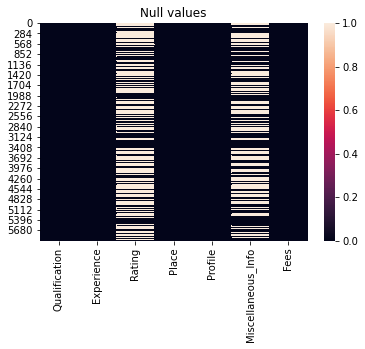

In [257]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations: Null values are present in columns Rating , Place and Miscellaneous_Info.

In [258]:
#Splitting Experience column

df['Experience'] = df.Experience.str.split(" ",expand=True,)
df['Experience']= pd.to_numeric(df['Experience'])
df['Experience']

0       24
1       12
2        9
3       12
4       20
        ..
5956    19
5957    33
5958    41
5959    15
5960    17
Name: Experience, Length: 5961, dtype: int64

In [259]:
print(df['Experience'].dtype)

int64


In [260]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [261]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [262]:
df['Qualification'].value_counts()

BDS                                                                                      488
BHMS                                                                                     477
BAMS                                                                                     471
MBBS                                                                                     334
MBBS, MS - ENT                                                                           220
                                                                                        ... 
POST GRADUATE IN HOMOEOPATHY, BHMS                                                         1
BSAM, BNYS                                                                                 1
MBBS, DDV, FCPS - Dermatology, Venereology & Leprosy, DNB - Dermatology & Venereology      1
BAMS, MBBS, MD - Ayurveda Medicine                                                         1
MDS - Orthodontics, BDS, Post Graduate Certificate Course In Aesthetic

In [263]:
# Extract cities

df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [264]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,BAMS,20,100%,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [265]:
# Dealing with  Rating Column
# Replace Nan by -99%,

df['Rating'].fillna('-99%', inplace=True)

In [266]:
# Set dtype to int 

df['Rating']= df['Rating'].str[:-1].astype('int')

In [267]:
#Grouping in bins

bins= [-99,0,10,20,30,40,50,60,70,80,90,100]
labels= [i for i in range(11)]

df['Rating']= pd.cut(df['Rating'], bins= bins, labels= labels, include_lowest=True)
df['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [268]:
#Will drop Qualification as its Profile decide's doctor's identity and we are not getting proper info

df.drop(["Qualification", 'Miscellaneous_Info'],axis=1,inplace=True)

In [269]:
df.head()

,Experience,Rating,Place,Profile,Fees,City
0,24,10,Kakkanad,Homeopath,100,Ernakulam
1,12,10,Whitefield,Ayurveda,350,Bangalore
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore
4,20,10,Keelkattalai,Ayurveda,250,Chennai


# EDA

In [270]:
df['Place'].value_counts()

HSR Layout         75
Andheri West       70
Dwarka             68
Banjara Hills      64
Mulund West        54
                   ..
Khanpur             1
Nayandahalli        1
Kuppakonanpudur     1
J.C Nagar           1
ECR Road            1
Name: Place, Length: 867, dtype: int64

In [271]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [272]:
print(df.index[df.City == 'e'])

Int64Index([3980], dtype='int64')


In [273]:
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

In [274]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  26
Name: City, dtype: int64

In [275]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

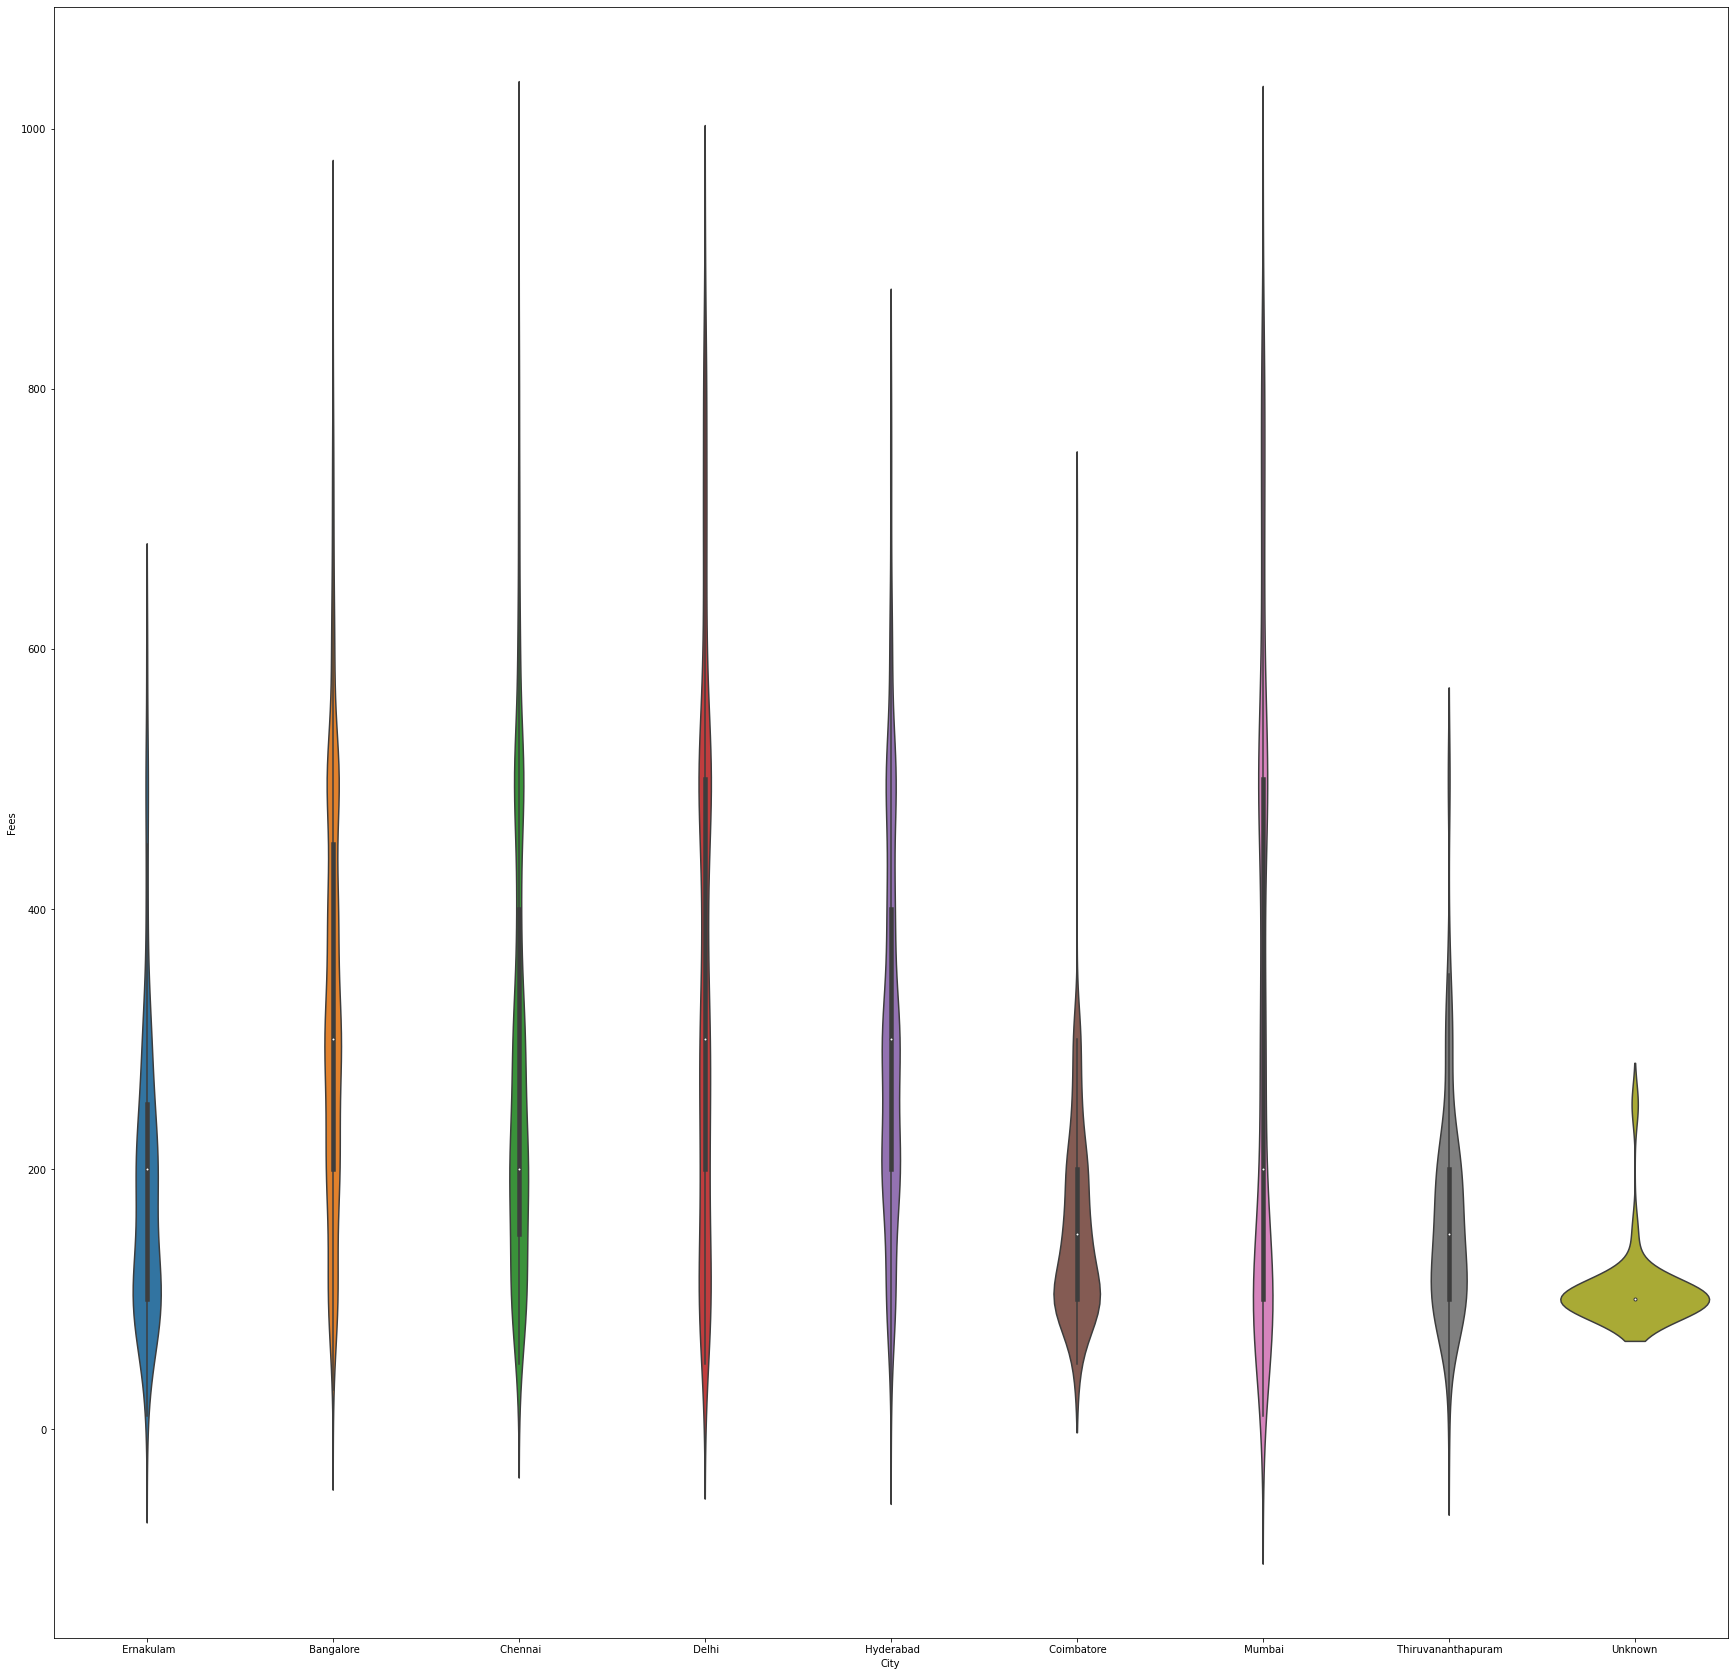

In [276]:
plt.figure(figsize=(30,30))
sns.violinplot(x='City', y='Fees', data= df)

Observations: Fees distribution is almost same and high in metro cities like Bangalore, Chennai, Delhi, Hyderabad, Mumbai.

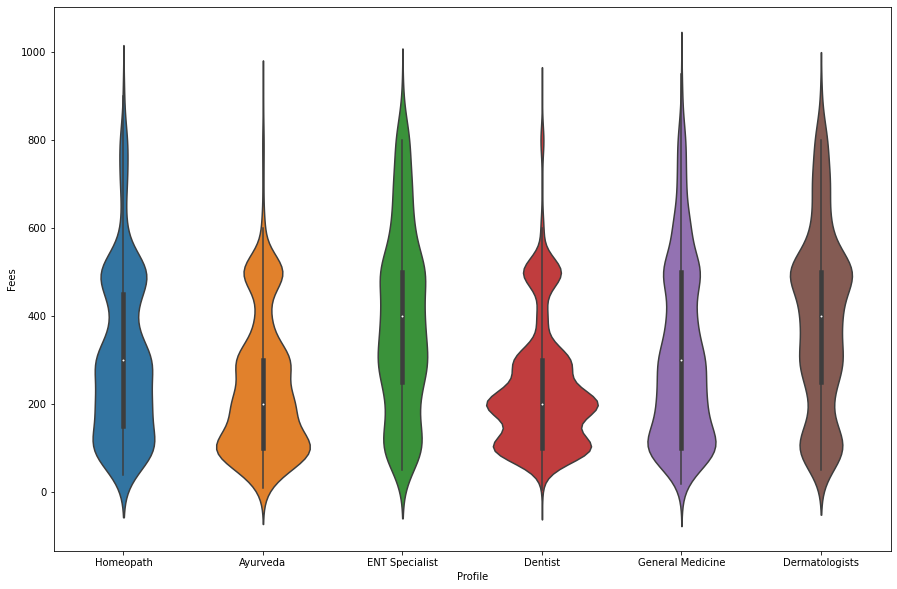

In [277]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Profile', y='Fees', data= df)

Observations: Almost same fees distribution is for Profiles ENT Specialist, General Medicine, Dematologists upto 900. Where as Dentist and Ayurveda fees distributed from upto 600 only.

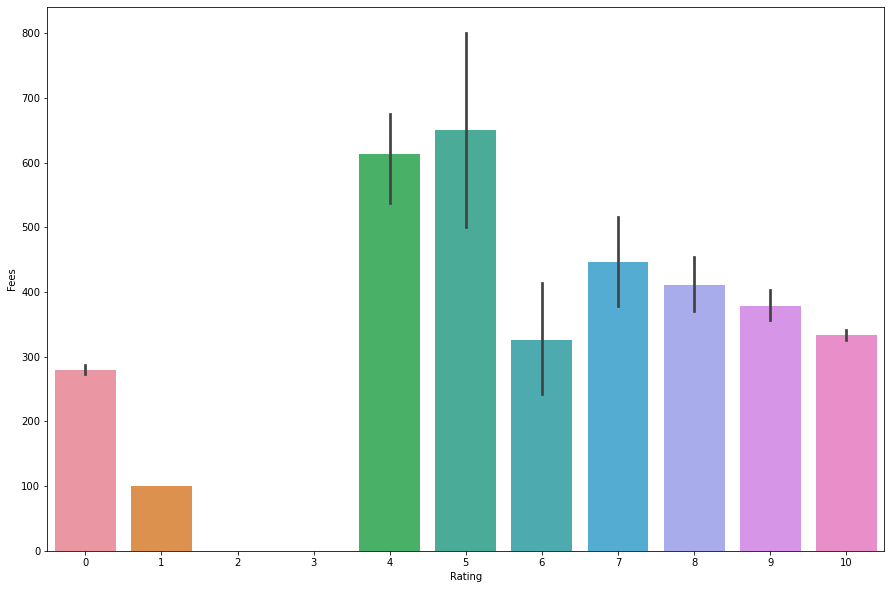

In [278]:
plt.figure(figsize=(15,10))
sns.barplot(x='Rating', y='Fees', data=df)

Observations: Doctors whose ratings are 5 i.e. 50% to 60% are charging more fees where as doctors with ratings of 1 i.e. 0% to 10% are charging less fees.

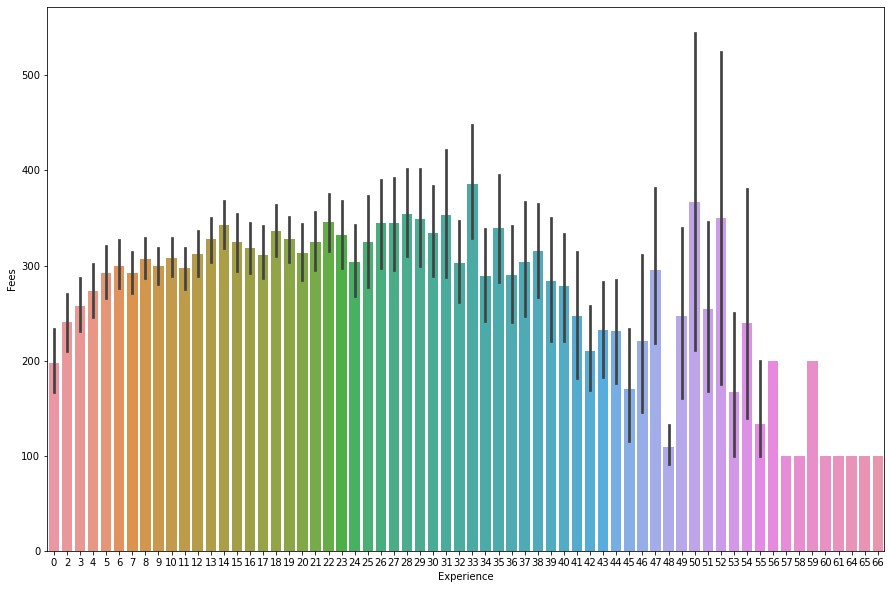

In [279]:
plt.figure(figsize=(15,10))
sns.barplot(x='Experience', y='Fees', data=df)

Observations: Doctors with experience of 33 and 50 charging more fees. Where as Doctors with experience from 60 to 66 are charging less fees. Also as experince increased, along whith this rate of fees also increases upto experience of 33.

In [280]:
df.dtypes

Experience       int64
Rating        category
Place           object
Profile         object
Fees             int64
City            object
dtype: object

In [281]:
df['Rating']= df['Rating'].astype('int')

In [282]:
df.dtypes

Experience     int64
Rating         int32
Place         object
Profile       object
Fees           int64
City          object
dtype: object

In [283]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [284]:
#Encoding

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes== 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
df

,Experience,Rating,Place,Profile,Fees,City
0,24,10,296.0,5.0,100,4.0
1,12,10,856.0,0.0,350,0.0
2,9,0,452.0,3.0,300,0.0
3,12,0,68.0,0.0,250,0.0
4,20,10,335.0,0.0,250,1.0
...,...,...,...,...,...,...
5956,19,10,70.0,3.0,300,0.0
5957,33,0,535.0,4.0,100,1.0
5958,41,10,215.0,4.0,600,3.0
5959,15,9,841.0,4.0,100,6.0


Experience       AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Rating        AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Place         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Profile       AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Fees          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
City          AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
dtype: object

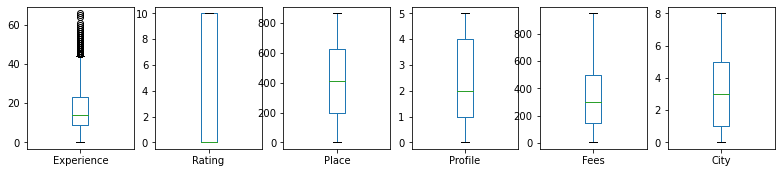

In [285]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: We can see that there is no outliers except column Experience.

In [286]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
df_new= df[(z<3).all(axis=1)]
df_new

,Experience,Rating,Place,Profile,Fees,City
0,24,10,296.0,5.0,100,4.0
1,12,10,856.0,0.0,350,0.0
2,9,0,452.0,3.0,300,0.0
3,12,0,68.0,0.0,250,0.0
4,20,10,335.0,0.0,250,1.0
...,...,...,...,...,...,...
5956,19,10,70.0,3.0,300,0.0
5957,33,0,535.0,4.0,100,1.0
5958,41,10,215.0,4.0,600,3.0
5959,15,9,841.0,4.0,100,6.0


In [287]:
df_new.shape

(5903, 6)

In [288]:
df.shape

(5961, 6)

Observations: We can see there is almost 58 rows removed due to outliers present.

In [289]:
df=df_new

In [290]:
#Splitting of Data
x= df.drop('Fees', axis=1)
x

,Experience,Rating,Place,Profile,City
0,24,10,296.0,5.0,4.0
1,12,10,856.0,0.0,0.0
2,9,0,452.0,3.0,0.0
3,12,0,68.0,0.0,0.0
4,20,10,335.0,0.0,1.0
...,...,...,...,...,...
5956,19,10,70.0,3.0,0.0
5957,33,0,535.0,4.0,1.0
5958,41,10,215.0,4.0,3.0
5959,15,9,841.0,4.0,6.0


In [291]:
y= df['Fees']
y

0       100
1       350
2       300
3       250
4       250
       ... 
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees, Length: 5903, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000195219D01C0>,
      dtype=object)

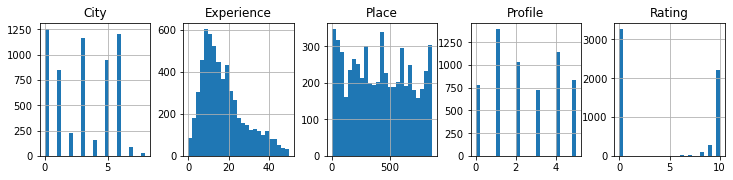

In [292]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: We can see Experience column data is some what Left Skewed.

In [293]:
x.skew()

Experience    0.897661
Rating        0.234429
Place         0.111883
Profile       0.121336
City          0.010868
dtype: float64

In [294]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Experience   -0.934248
Rating        0.234429
Place         0.111883
Profile       0.121336
City          0.010868
dtype: float64

In [295]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Experience,Rating,Place,Profile,City
0,0.764561,1.159067,-0.453395,1.547726,0.399161
1,-0.188559,1.159067,1.732590,-1.466138,-1.329242
2,-0.570964,-0.895703,0.155558,0.342181,-1.329242
3,-0.188559,-0.895703,-1.343404,-1.466138,-1.329242
4,0.510435,1.159067,-0.301157,-1.466138,-0.897142
...,...,...,...,...,...
5898,0.439322,1.159067,-1.335596,0.342181,-1.329242
5899,1.212730,-0.895703,0.479552,0.944953,-0.897142
5900,1.520720,1.159067,-0.769582,0.944953,-0.032940
5901,0.114083,0.953590,1.674037,0.944953,1.263362


In [296]:
x= new_x
x.shape

(5903, 5)

In [297]:
y.shape

(5903,)

In [298]:
#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [299]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=i)
    lm= LinearRegression()
    lm.fit(x_train, y_train)
    pred_lm= lm.predict(x_test)
    acc= r2_score(y_test, pred_lm)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.08786425276473708
85


In [300]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=85)

In [301]:
lm= LinearRegression()
ls= Lasso()
rd= Ridge()
enr= ElasticNet()
svr= SVR()
ad= AdaBoostRegressor()
rf= RandomForestRegressor()

models= [lm, ls, rd, enr, svr, ad, rf]

for m in models:
    print(m, '- R2_Score')
    m.fit(x_train, y_train)
    pred= m.predict(x_test)
    print(r2_score(y_test, pred))
    print()

LinearRegression() - R2_Score
0.07358226947074142

Lasso() - R2_Score
0.0724042869143946

Ridge() - R2_Score
0.07357548466437602

ElasticNet() - R2_Score
0.05770420080987082

SVR() - R2_Score
0.06672299114757863

AdaBoostRegressor() - R2_Score
0.11641349279135349

RandomForestRegressor() - R2_Score
0.10205762759644199



In [302]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_lm= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_lm.mean())

CV score of  LinearRegression() 0.053031267662125826
CV score of  Lasso() 0.05291549977715173
CV score of  Ridge() 0.053031835518798934
CV score of  ElasticNet() 0.04659032126829701
CV score of  SVR() 0.03885977378404437
CV score of  AdaBoostRegressor() 0.1161448395238738
CV score of  RandomForestRegressor() 0.141717863570481


Observations: From above we can observe that for SVR model there is less difference in r2_score and cross validation r2_score so we will select SVR model for final predictions.

In [303]:
#Hyperparameter Tuning for Best selected model SVR

from sklearn.model_selection import GridSearchCV

parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"], 'gamma': ["scale", "auto"]}

GSV= GridSearchCV(svr, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [304]:
GSV_predict= GSV.best_estimator_.predict(x_test)
print(r2_score(y_test, GSV_predict))
print('Mean absolute error:',mean_absolute_error(y_test, GSV_predict))
print('Mean squared error: ', mean_squared_error(y_test, GSV_predict))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test, GSV_predict)))

0.09984070216701746
Mean absolute error: 137.29649247366973
Mean squared error:  30632.241507150746
Root mean squared error:  175.0206887974983


In [305]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'doctor_fees_best_svr_model.obj')

['doctor_fees_best_svr_model.obj']

# Working With Test Data

In [306]:
#Import Dataset
ds= pd.read_excel('Doctor_Fees_Final_Test.xlsx')
ds.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [307]:
df= pd.DataFrame(data=ds)
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [308]:
df.shape

(1987, 6)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [310]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [311]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [312]:
#Checking for Null values
df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Observations: Null values are present in columns Rating, place and Miscellaneous_Info. 

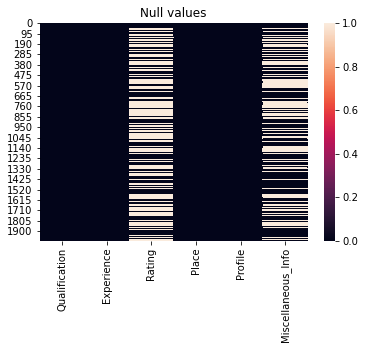

In [313]:
sns.heatmap(df.isnull())
plt.title("Null values")
plt.show()

Observations: Null values are present in columns Rating, place and Miscellaneous_Info.

In [314]:
#Splitting Experience column

df['Experience'] = df.Experience.str.split(" ",expand=True,)
df['Experience']= pd.to_numeric(df['Experience'])
df['Experience']

0       35
1       31
2       40
3        0
4       16
        ..
1982    10
1983     4
1984     9
1985    12
1986     8
Name: Experience, Length: 1987, dtype: int64

In [315]:
print(df['Experience'].dtype)

int64


In [316]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [317]:
df['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [318]:
df['Qualification'].value_counts()

BAMS                                                                                                         153
BHMS                                                                                                         150
BDS                                                                                                          144
MBBS                                                                                                         107
MBBS, MD - Dermatology                                                                                        64
                                                                                                            ... 
B.Sc, BAMS, MD - Ayurveda Medicine                                                                             1
MBBS, Diploma in Orthopaedics, MS - Orthopaedics                                                               1
MBBS, DNB - General Medicine, Fellowship in Diabetology(Johns Hopkins University School of Medic

In [319]:
# Extract cities

df["Place"].fillna("Unknown,Unknown",inplace=True)
df["Place"] = df["Place"].str.split(",")
df["City"] = df["Place"].str[-1]
df["Place"] = df["Place"].str[0]

In [320]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City
0,MBBS,35,NaN,Ghatkopar East,General Medicine,NaN,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,NaN,West Marredpally,ENT Specialist,NaN,Hyderabad
2,"MBBS, DDVL",40,70%,KK Nagar,Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai
3,BAMS,0,NaN,New Ashok Nagar,Ayurveda,NaN,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100%,Kanakpura Road,Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore


In [321]:
# Dealing with  Rating Column
# Replace Nan by -99%,

df['Rating'].fillna('-99%', inplace=True)

In [322]:
# Set dtype to int 

df['Rating']= df['Rating'].str[:-1].astype('int')

In [323]:
#Grouping in bins

bins= [-99,0,10,20,30,40,50,60,70,80,90,100]
labels= [i for i in range(11)]

df['Rating']= pd.cut(df['Rating'], bins= bins, labels= labels, include_lowest=True)
df['Rating'].value_counts().sort_index()

0     1090
1        0
2        0
3        0
4        0
5        0
6        9
7       14
8       27
9      108
10     739
Name: Rating, dtype: int64

In [324]:
#Will drop Qualification as its Profile decide's doctor's identity and we are not getting proper info

df.drop(["Qualification", 'Miscellaneous_Info'],axis=1,inplace=True)

In [325]:
df.head()

,Experience,Rating,Place,Profile,City
0,35,0,Ghatkopar East,General Medicine,Mumbai
1,31,0,West Marredpally,ENT Specialist,Hyderabad
2,40,7,KK Nagar,Dermatologists,Chennai
3,0,0,New Ashok Nagar,Ayurveda,Delhi
4,16,10,Kanakpura Road,Dentist,Bangalore


# EDA

In [326]:
df['Place'].value_counts()

Mulund West               27
Andheri West              27
Dwarka                    26
Whitefield                23
HSR Layout                22
                          ..
Banashankari 1st Stage     1
Yellareddyguda             1
Govandi                    1
Vileparle                  1
Vyttila                    1
Name: Place, Length: 590, dtype: int64

In [327]:
df['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [328]:
df['City'].value_counts()

 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
Unknown                  6
Name: City, dtype: int64

In [329]:
df['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [330]:
df.dtypes

Experience       int64
Rating        category
Place           object
Profile         object
City            object
dtype: object

In [331]:
df['Rating']= df['Rating'].astype('int')

In [332]:
df.dtypes

Experience     int64
Rating         int32
Place         object
Profile       object
City          object
dtype: object

In [333]:
#Encoding

x= df

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

for i in x.columns:
    if x[i].dtypes== 'object':
        x[i]= enc.fit_transform(x[i].values.reshape(-1,1))
x

,Experience,Rating,Place,Profile,City
0,35,0,142.0,4.0,6.0
1,31,0,578.0,3.0,5.0
2,40,7,212.0,2.0,1.0
3,0,0,373.0,0.0,3.0
4,16,10,231.0,1.0,0.0
...,...,...,...,...,...
1982,10,0,58.0,0.0,0.0
1983,4,0,96.0,2.0,1.0
1984,9,0,423.0,4.0,1.0
1985,12,10,26.0,1.0,0.0


Experience       AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Rating        AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Place         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Profile       AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
City          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
dtype: object

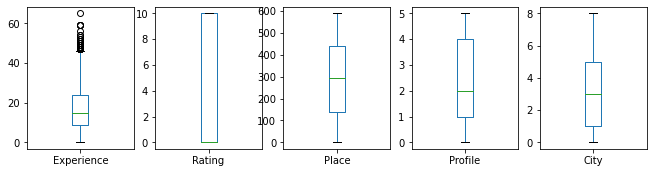

In [334]:
#Checking for the Outliers

x.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: We can see that there is no outliers except column Experience.

In [335]:
#Removing the Outliers

from scipy.stats import zscore
z= np.abs(zscore(x))
threshold=3
x_new= x[(z<3).all(axis=1)]
x_new

,Experience,Rating,Place,Profile,City
0,35,0,142.0,4.0,6.0
1,31,0,578.0,3.0,5.0
2,40,7,212.0,2.0,1.0
3,0,0,373.0,0.0,3.0
4,16,10,231.0,1.0,0.0
...,...,...,...,...,...
1982,10,0,58.0,0.0,0.0
1983,4,0,96.0,2.0,1.0
1984,9,0,423.0,4.0,1.0
1985,12,10,26.0,1.0,0.0


In [336]:
x_new.shape

(1976, 5)

In [337]:
x.shape

(1987, 5)

Observations: We can see there is almost  11  rows removed due to outliers.

In [338]:
x=x_new

In [339]:
# Standardization of Data

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(data= scaled_x, columns= x.columns)
new_x

,Experience,Rating,Place,Profile,City
0,1.573794,-0.902147,-0.849665,0.901460,1.298701
1,1.210762,-0.902147,1.660199,0.297430,0.860104
2,2.027583,0.536463,-0.446705,-0.306600,-0.894286
3,-1.602730,-0.902147,0.480103,-1.514661,-0.017091
4,-0.150605,1.153010,-0.337330,-0.910631,-1.332883
...,...,...,...,...,...
1971,-0.695151,-0.902147,-1.333217,-1.514661,-1.332883
1972,-1.239698,-0.902147,-1.114467,-0.306600,-0.894286
1973,-0.785909,-0.902147,0.767931,0.901460,-0.894286
1974,-0.513636,1.153010,-1.517427,-0.910631,-1.332883


In [340]:
x= new_x
x.shape

(1976, 5)

In [341]:
#Loading the Best Model

new_data= joblib.load('doctor_fees_best_svr_model.obj')
pred_test= new_data.predict(x)
pred_test

array([209.24599913, 211.62120028, 313.88835315, ..., 294.6903181 ,
       262.21956965, 280.26785553])

In [342]:
pred_test[0]

209.2459991319072

In [343]:
pred_test[1975]

280.26785552903465

Conclusion: For Analysis of Doctor_Consultation_Fees_Project  we have selected SupportVectorRegressor model.